In [27]:
import pandas as pd
import itertools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


df = pd.read_csv(r'C:\Users\zygophythewhale267\Documents\Portfolio_Projects\Data_Analyst_Projects\Apple-Fitness-Data.csv')
print(df.head())

         Date       Time  Step Count  Distance  Energy Burned  \
0  2023-03-21  16:01:23           46   0.02543         14.620   
1  2023-03-21  16:18:37          645   0.40041         14.722   
2  2023-03-21  16:31:38           14   0.00996         14.603   
3  2023-03-21  16:45:37           13   0.00901         14.811   
4  2023-03-21  17:10:30           17   0.00904         15.153   

   Flights Climbed  Walking Double Support Percentage  Walking Speed  
0                3                              0.304          3.060  
1                3                              0.309          3.852  
2                4                              0.278          3.996  
3                3                              0.278          5.040  
4                3                              0.281          5.184  


In [28]:
#Looking to see if there are any null values present
#First way loops through all of the columns to see if there is anything missing, indicating null values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
#Second way does the same thing that the first method, but is using a built in python method called isnull
print(df.isnull().sum())

Date - 0%
Time - 0%
Step Count - 0%
Distance - 0%
Energy Burned - 0%
Flights Climbed - 0%
Walking Double Support Percentage - 0%
Walking Speed - 0%
Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64


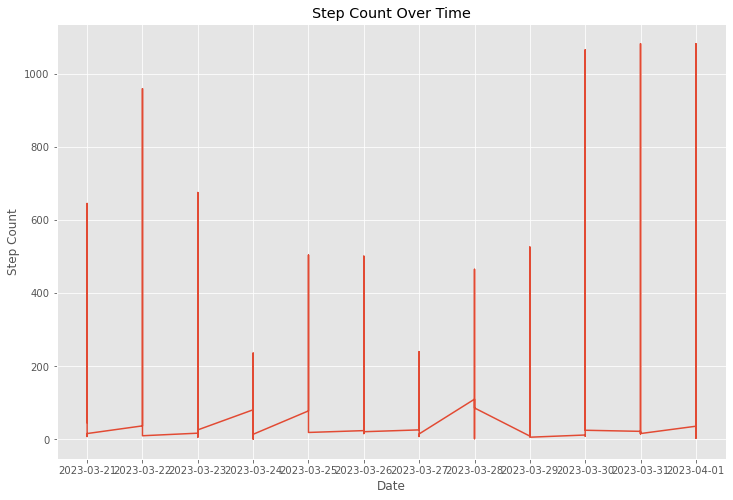

In [8]:
# Step Count Over Time
plt.plot(df['Date'], df['Step Count'])
plt.title("Step Count Over Time")
plt.xlabel("Date")
plt.ylabel('Step Count')
plt.show()


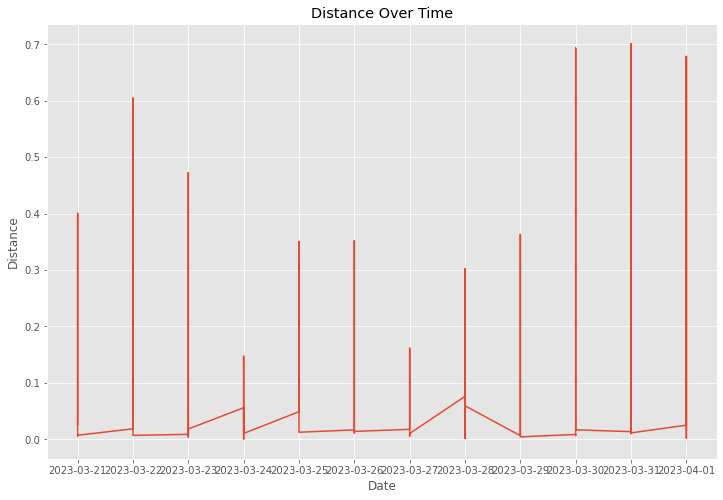

In [9]:
# Distance Covered Over Time
# Step Count Over Time
plt.plot(df['Date'], df['Distance'])
plt.title("Distance Over Time")
plt.xlabel("Date")
plt.ylabel('Distance')
plt.show()

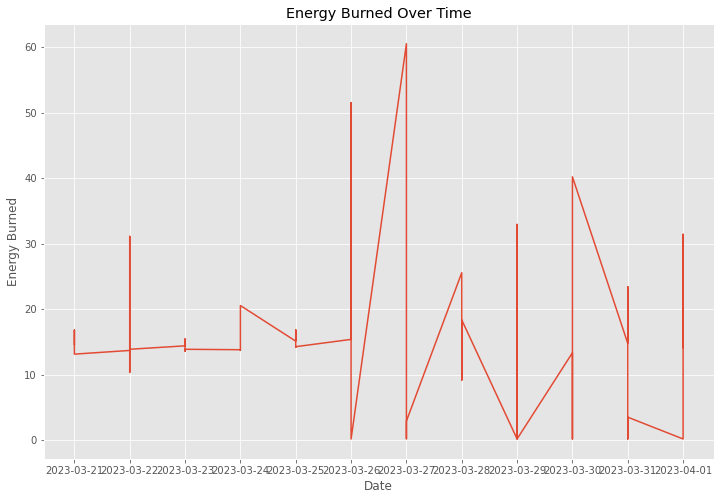

In [10]:
# Energy Burned Over Time
plt.plot(df['Date'], df['Energy Burned'])
plt.title("Energy Burned Over Time")
plt.xlabel("Date")
plt.ylabel('Energy Burned')
plt.show()

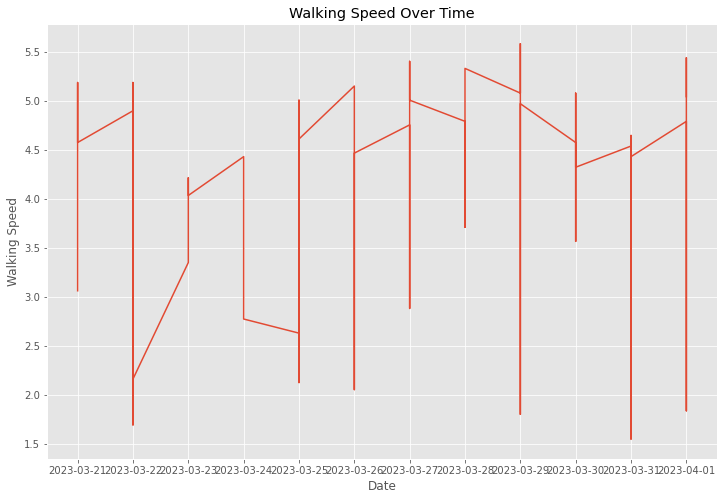

In [11]:
# Walking Speed Over Time
plt.plot(df['Date'], df['Walking Speed'])
plt.title("Walking Speed Over Time")
plt.xlabel("Date")
plt.ylabel('Walking Speed')
plt.show()

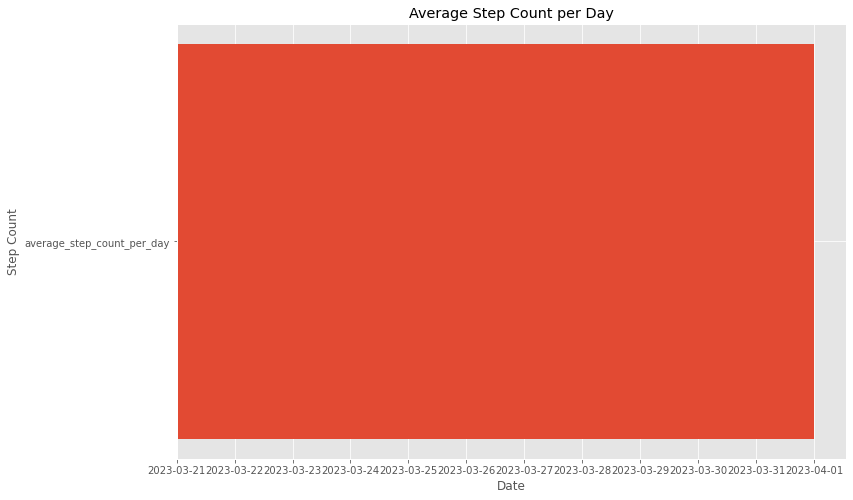

In [19]:
# Calculate Average Step Count per Day
average_step_count_per_day = df.groupby("Date")["Step Count"].mean().reset_index()

plt.barh('average_step_count_per_day', df['Date'], df['Step Count'])
plt.title("Average Step Count per Day")
plt.xlabel("Date")
plt.ylabel('Step Count')
plt.show()

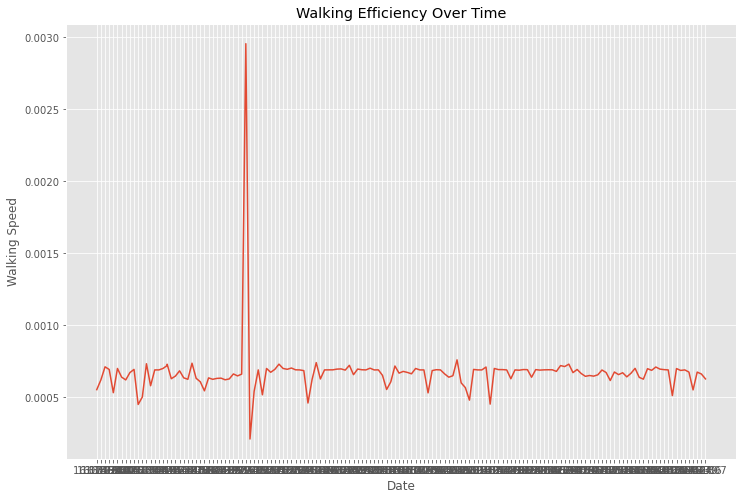

In [20]:
# Calculate Walking Efficiency
df["Walking Efficiency"] = df["Distance"] / df["Step Count"]
plt.plot(df['Time'], df["Walking Efficiency"])
plt.title("Walking Efficiency Over Time")
plt.xlabel("Date")
plt.ylabel('Walking Speed')
plt.show()

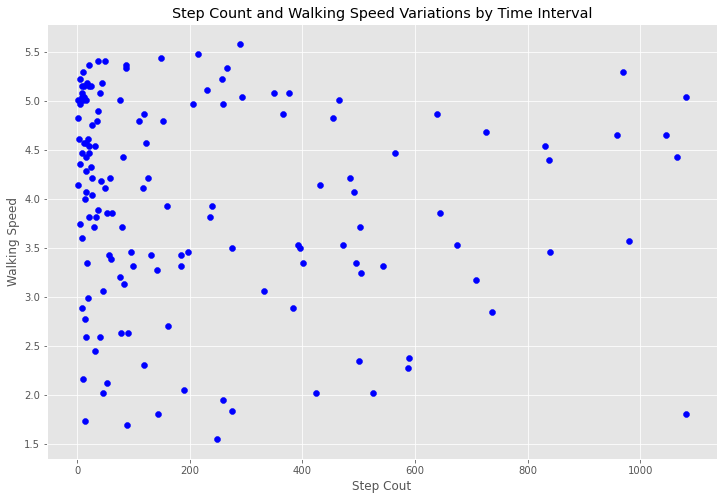

In [33]:
# Create Time Intervals
time_intervals = pd.cut(pd.to_datetime(df["Time"]).dt.hour,
                        bins=[0, 12, 18, 24],
                        labels=["Morning", "Afternoon", "Evening"], 
                        right=False)
df["Time Interval"] = time_intervals
colors = ['blue']
plt.scatter(x = df['Step Count'], y = df['Walking Speed'],c = colors,cmap = df["Time Interval"] )
plt.title("Step Count and Walking Speed Variations by Time Interval")
plt.xlabel("Step Cout")
plt.ylabel('Walking Speed')
plt.show()